<font color="blue" size="20"><b>Crop Yield Prediction Model</b></font>

## 1. Importing necessary python libraries
***
This is where we import all the necessary python libraries that will enable us carry out all the operations/manipulation needed for processing our data like reading our data,visualization,modelling e.t.c
***

In [1]:
import numpy as np # for linear algebra and manipulating arrays
import pandas as pd # for data processing, readding dataset (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualisation of barplot, boxplots etc.
%matplotlib inline
import seaborn as sns # for plotting diagrams and heatmaps

In [2]:
data = pd.read_csv('Data.csv') # the pandas library is used to read or import the dataset into jupyter notebook environment

data.head(10)  # this line of code will print the first 10 rows on the dataset

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


## 2. Data Analysis 

In [3]:
data.shape # this line of code with print the (number of rows, number of columns) in the dataset

(2307, 8)

In [4]:
print(set(data['Label'])) # this line of code puts all the different labels in a set, there are about 24 different crops

{'rice', 'cotton', 'mungbean', 'pigeonpeas', 'orange', 'maize', 'mango', 'cashew', 'cassava/yam', 'mothbeans', 'watermelon', 'jute/ewedu', 'kidneybeans', 'black beans', 'grapes', 'palm tree', 'papaya', 'coconut', 'banana', 'beni/sesame seed', 'muskmelon', 'chickpea', 'potato', 'coffee'}


In [5]:
data['Label'].unique() # this line of code prints all the different crops in a list

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'black beans', 'beni/sesame seed',
       'cashew', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon',
       'palm tree', 'orange', 'papaya', 'coconut', 'cotton', 'jute/ewedu',
       'coffee', 'potato', 'cassava/yam'], dtype=object)

### Data cleaning
***
The first step to cleaning the data is to check for missing values, because we cannot train a model on a data that contains missing values.
***

In [6]:
data.isnull().sum() # this line of code sums up the number of missing values in each column. In this case it returns zero for 
                    # all the columns because the data does not have any missing values.

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Label          0
dtype: int64

In [7]:
data.describe() # this line of code summarizes the dataset for us.

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH,Rainfall
count,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000
mean,53.137841,52.948418,52.624187,25.554942,69.095630,6.477948,102.588546
std,39.072476,32.521784,54.920992,4.997793,24.427662,1.830180,54.045574
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,22.000000,28.000000,21.000000,22.747679,56.319725,5.935545,65.533776
50%,38.000000,51.000000,34.000000,25.530827,79.787252,6.405054,92.372389
75%,87.000000,68.000000,51.000000,28.436100,89.388297,6.901376,121.561271
max,179.000000,145.000000,250.000000,43.675493,99.981876,86.000000,298.560117


## 3. Data Visualization and EDA
***
Here we make use of plots and diagrams to see the relationship between the various features in the dataset.
***
Firstly, we will check the number of times each crop in the 'Label' column is present. It is import that all the crops are present equally to prevent the model from making biased predictionis, thereby favoring one class.

<Figure size 432x864 with 0 Axes>

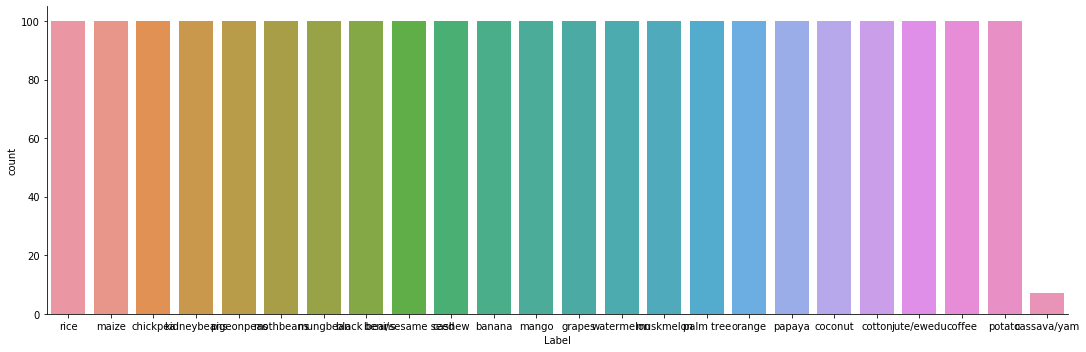

<Figure size 432x864 with 0 Axes>

In [8]:
sns.catplot(data=data,x="Label",aspect=3,kind='count')
plt.figure(figsize = (6,12))

***
We see that all the crops are equally present except  <b>'casssava/yam'</b>  which appears to be very small and this makes it insignificant.
***

In [9]:
data['Label'].value_counts()

chickpea            100
banana              100
cotton              100
pigeonpeas          100
maize               100
mango               100
cashew              100
mothbeans           100
kidneybeans         100
grapes              100
palm tree           100
coconut             100
beni/sesame seed    100
muskmelon           100
black beans         100
potato              100
coffee              100
mungbean            100
orange              100
jute/ewedu          100
watermelon          100
papaya              100
rice                100
cassava/yam           7
Name: Label, dtype: int64

***
We need to drop all records with label  <b>'cassava/yam'</b>  because it has the least number of currence and may serve as outliers
***

In [10]:
data = data.loc[~(data['Label'] == 'cassava/yam'),:] # this line of code will filter the dataset and locate all the roe with
                                                     # cassava/yam label and drop them. It will drop 7 rows.

In [11]:
# data.drop(yam, inplace = True)
data['Label'].value_counts()   # from the result, we see that the 'cassava/yam' label is no longer present

chickpea            100
coconut             100
cotton              100
pigeonpeas          100
maize               100
mango               100
cashew              100
mothbeans           100
kidneybeans         100
grapes              100
palm tree           100
beni/sesame seed    100
banana              100
muskmelon           100
black beans         100
potato              100
coffee              100
mungbean            100
orange              100
jute/ewedu          100
watermelon          100
papaya              100
rice                100
Name: Label, dtype: int64

In [12]:
data.shape  # the shape of the data is now equal

(2300, 8)

In [14]:
len(data['Label'].unique()) # Instead of 24 we now have only 23 unique crops because we dropped 'cassava/yam'

23

### Correlation Matrix
***
The fact that the dataset has no missing value makes our work easier,so next we move to dropping features that might
reduce the accuracy of our model but to be able to do that first you to have a domain knowledge of the kind of system
you are working on. Another way to eliminate features is by checking for the correlation between these features.
 

Using Pearson Correlation, we are doing a plot for the correlation between the features in our dataset and it is going to show us as a heatmap and this is acheived using the seaborn library we imported earlier.
***

***
Basically if two features are highly correlated with more than 80% (0.8) correlation, you can drop one of the two feature
if they arre both independent features e.g(loancontact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate  or our X features),but if they are highly correlated with the dependent variable ('subscribed' or the Y feature) we won't remove it because it will be veery helpful in our prediction.
***

***
Also, only features with numerical values appear on the correlation diagram.

In data preparation whatever we do to our train data, we do the same to the test data
***

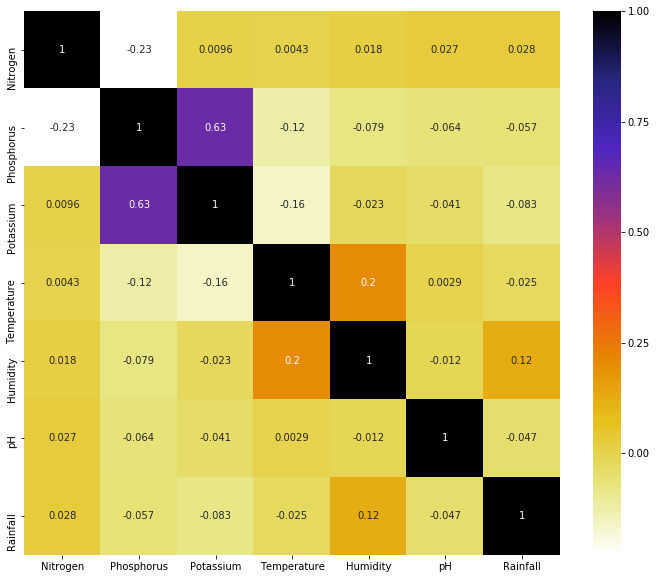

In [15]:
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

Since none of the features in the dataset is highly correlated with the other, it means that all the variables are distinct and will be useful to the model in making presiction.
***

## 4. Splitting the data into Dependent (y) and Independent (x) Variables
***
This is the first step to splittiing the data into train and test set. Here we seperate the target variable ('Label') from the independent variables.

In [16]:
x = data.drop(['Label'], axis = 1) # these are the set of independent variables

y = data['Label'] # this the target variable

***
<b>Note: </b>Later we will be building four models, we want to create two empty lists where we will append the values of their accuracy and the name of the model so that we can be able to visualize it in a plot
***

In [18]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model1 = []

## 5. Splitting the data into Train and Test set
***
what we are doing here is preparing the data for machine learning modeling.

we split the data into train and test set, where the train set is 80% of the entire dataset and the test set is 20%
***

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2, stratify = y, random_state =1342)

## 6. Modeling
***
The first step is to import the machine learning algorithm to be used. In this case it is the Random Forest Classifier.

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
RFC = RandomForestClassifier() #Here wew are just assigning a variable name and creating an object class RandomForestClassifier                

In [28]:
RFC.fit(x_train,y_train) # this is the actual training process

RandomForestClassifier()

In [29]:
# The model is now ready to make predictons using only the features from the test data
RFC_prediction = RFC.predict(x_test)
RFC_x_train_prediction = RFC.predict(x_train) 


# Performance Evaluation of the Model
***
This is where we assess the model and check how accurate it was ableto make these predictions
***

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn import metrics

In [31]:
accuracy_RFC = metrics.accuracy_score(y_test, RFC_prediction)

In [32]:
print('Test accuracy_RFC: ',accuracy_RFC,'\n')
print('Train accuracy: ',accuracy_score(y_train,RFC_x_train_prediction),'\n')
print(classification_report(y_test, RFC_prediction))

Test accuracy_RFC:  0.9869565217391304 

Train accuracy:  1.0 

                  precision    recall  f1-score   support

          banana       1.00      1.00      1.00        20
beni/sesame seed       1.00      1.00      1.00        20
     black beans       1.00      1.00      1.00        20
          cashew       1.00      1.00      1.00        20
        chickpea       1.00      1.00      1.00        20
         coconut       1.00      1.00      1.00        20
          coffee       1.00      1.00      1.00        20
          cotton       1.00      1.00      1.00        20
          grapes       1.00      1.00      1.00        20
      jute/ewedu       0.77      1.00      0.87        20
     kidneybeans       1.00      1.00      1.00        20
           maize       1.00      1.00      1.00        20
           mango       1.00      1.00      1.00        20
       mothbeans       1.00      1.00      1.00        20
        mungbean       1.00      1.00      1.00        20
       

### Saving Random Forest Classifier model in a pickle file
***
The pickle file of the model is what will be deployed on the web application.

In [33]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RFC_pkl_filename = 'RandomForest.pkl'

# Open the file to save as pkl file
RFC_Model_pkl = open(RFC_pkl_filename, 'wb')
pickle.dump(RFC, RFC_Model_pkl)

# Close the pickle instances
RFC_Model_pkl.close()

### Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DTC = DecisionTreeClassifier()

In [36]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
DTC_prediction = DTC.predict(x_test)
DTC_x_train_prediction = DTC.predict(x_train) 

In [38]:
accuracy_DTC = metrics.accuracy_score(y_test, DTC_prediction)

In [39]:
print('Test accuracy_DTC: ',accuracy_DTC,'\n')
print('Train accuracy: ',accuracy_score(y_train,DTC_x_train_prediction),'\n')
print(classification_report(y_test, DTC_prediction))

Test accuracy_DTC:  0.9847826086956522 

Train accuracy:  1.0 

                  precision    recall  f1-score   support

          banana       1.00      1.00      1.00        20
beni/sesame seed       1.00      1.00      1.00        20
     black beans       1.00      0.95      0.97        20
          cashew       1.00      1.00      1.00        20
        chickpea       1.00      1.00      1.00        20
         coconut       1.00      1.00      1.00        20
          coffee       1.00      1.00      1.00        20
          cotton       1.00      1.00      1.00        20
          grapes       1.00      1.00      1.00        20
      jute/ewedu       0.79      0.95      0.86        20
     kidneybeans       1.00      1.00      1.00        20
           maize       1.00      1.00      1.00        20
           mango       1.00      1.00      1.00        20
       mothbeans       0.95      1.00      0.98        20
        mungbean       1.00      1.00      1.00        20
       

### Saving the Decision Tree Classifier model in a pickle file

In [40]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DTC_pkl_filename = 'DecisionTree.pkl'

# Open the file to save as pkl file
DTC_Model_pkl = open(DTC_pkl_filename, 'wb')
pickle.dump(DTC, DTC_Model_pkl)

# Close the pickle instances
DTC_Model_pkl.close()

### Gradient Boost Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
GBC = GradientBoostingClassifier()

In [43]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [44]:
GBC_prediction = GBC.predict(x_test)
GBC_x_train_prediction = GBC.predict(x_train) 

In [45]:
accuracy_GBC = metrics.accuracy_score(y_test, GBC_prediction)

In [46]:
print('Test accuracy_GBC: ',accuracy_GBC,'\n')
print('Train accuracy: ',accuracy_score(y_train,GBC_x_train_prediction),'\n')
print(classification_report(y_test, GBC_prediction))

Test accuracy_GBC:  0.9891304347826086 

Train accuracy:  1.0 

                  precision    recall  f1-score   support

          banana       1.00      1.00      1.00        20
beni/sesame seed       1.00      1.00      1.00        20
     black beans       0.95      1.00      0.98        20
          cashew       1.00      1.00      1.00        20
        chickpea       1.00      1.00      1.00        20
         coconut       1.00      1.00      1.00        20
          coffee       1.00      1.00      1.00        20
          cotton       1.00      1.00      1.00        20
          grapes       1.00      1.00      1.00        20
      jute/ewedu       0.83      1.00      0.91        20
     kidneybeans       1.00      1.00      1.00        20
           maize       1.00      1.00      1.00        20
           mango       1.00      1.00      1.00        20
       mothbeans       1.00      0.95      0.97        20
        mungbean       1.00      1.00      1.00        20
       

### Saving the Gradient Boost Classifier in a pickle file

In [47]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
GBC_pkl_filename = 'GradientBoost.pkl'

# Open the file to save as pkl file
GBC_Model_pkl = open(GBC_pkl_filename, 'wb')
pickle.dump(GBC, GBC_Model_pkl)

# Close the pickle instances
GBC_Model_pkl.close()

## Building a Keras Classifier

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [50]:
from sklearn.preprocessing import OneHotEncoder

y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)



In [79]:


model = Sequential()

#Dense(64) is a fully connected layer with 64 hidden units
#In this first layer, you must specify the expected input data shape
#in this case 7 dimentional vectors

model.add(Dense(512, activation='relu', input_dim = 7))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

# model.add(Dropout(0.5))
model.add(Dense(23 ,activation = 'softmax'))

#SGD is the optimizer we will be making use of
sgd = SGD(lr=0.02, decay=1e-6, momentum=0.9, nesterov=True)

In [80]:
model.compile(loss='categorical_crossentropy',
             optimizer=sgd,
             metrics=['accuracy'])

In [81]:
model.fit(x_train,y_train,batch_size=128,epochs=500)

Epoch 1/500
1840/1840 [==============================] - 1s 486us/step - loss: nan - accuracy: 0.0413
Epoch 2/500
1840/1840 [==============================] - 0s 111us/step - loss: nan - accuracy: 0.0435
Epoch 3/500
1840/1840 [==============================] - 0s 119us/step - loss: nan - accuracy: 0.0435
Epoch 4/500
1840/1840 [==============================] - 0s 116us/step - loss: nan - accuracy: 0.0435
Epoch 5/500
1840/1840 [==============================] - 0s 111us/step - loss: nan - accuracy: 0.0435
Epoch 6/500
1840/1840 [==============================] - 0s 111us/step - loss: nan - accuracy: 0.0435
Epoch 7/500
1840/1840 [==============================] - 0s 118us/step - loss: nan - accuracy: 0.0435
Epoch 8/500
1840/1840 [==============================] - 0s 115us/step - loss: nan - accuracy: 0.0435
Epoch 9/500
1840/1840 [==============================] - 0s 114us/step - loss: nan - accuracy: 0.0435
Epoch 10/500
1840/1840 [==============================] - 0s 114us/step - loss: na

1840/1840 [==============================] - 0s 124us/step - loss: nan - accuracy: 0.0435
Epoch 157/500
1840/1840 [==============================] - 0s 141us/step - loss: nan - accuracy: 0.0435
Epoch 158/500
1840/1840 [==============================] - 0s 134us/step - loss: nan - accuracy: 0.0435
Epoch 159/500
1840/1840 [==============================] - 0s 116us/step - loss: nan - accuracy: 0.0435
Epoch 160/500
1840/1840 [==============================] - 0s 108us/step - loss: nan - accuracy: 0.0435
Epoch 161/500
1840/1840 [==============================] - 0s 114us/step - loss: nan - accuracy: 0.0435
Epoch 162/500
1840/1840 [==============================] - 0s 109us/step - loss: nan - accuracy: 0.0435
Epoch 163/500
1840/1840 [==============================] - 0s 156us/step - loss: nan - accuracy: 0.0435
Epoch 164/500
1840/1840 [==============================] - 0s 179us/step - loss: nan - accuracy: 0.0435
Epoch 165/500
1840/1840 [==============================] - 0s 108us/step - los

1840/1840 [==============================] - 0s 115us/step - loss: nan - accuracy: 0.0435
Epoch 311/500
1840/1840 [==============================] - 0s 115us/step - loss: nan - accuracy: 0.0435
Epoch 312/500
1840/1840 [==============================] - 0s 114us/step - loss: nan - accuracy: 0.0435
Epoch 313/500
1840/1840 [==============================] - 0s 112us/step - loss: nan - accuracy: 0.0435
Epoch 314/500
1840/1840 [==============================] - 0s 108us/step - loss: nan - accuracy: 0.0435
Epoch 315/500
1840/1840 [==============================] - 0s 112us/step - loss: nan - accuracy: 0.0435
Epoch 316/500
1840/1840 [==============================] - 0s 110us/step - loss: nan - accuracy: 0.0435
Epoch 317/500
1840/1840 [==============================] - 0s 113us/step - loss: nan - accuracy: 0.0435
Epoch 318/500
1840/1840 [==============================] - 0s 109us/step - loss: nan - accuracy: 0.0435
Epoch 319/500
1840/1840 [==============================] - 0s 109us/step - los

1840/1840 [==============================] - 0s 115us/step - loss: nan - accuracy: 0.0435 0s - loss: nan - accuracy: 0.03
Epoch 467/500
1840/1840 [==============================] - ETA: 0s - loss: nan - accuracy: 0.041 - 0s 107us/step - loss: nan - accuracy: 0.0435
Epoch 468/500
1840/1840 [==============================] - 0s 134us/step - loss: nan - accuracy: 0.0435
Epoch 469/500
1840/1840 [==============================] - 0s 108us/step - loss: nan - accuracy: 0.0435
Epoch 470/500
1840/1840 [==============================] - 0s 112us/step - loss: nan - accuracy: 0.0435
Epoch 471/500
1840/1840 [==============================] - 0s 111us/step - loss: nan - accuracy: 0.0435
Epoch 472/500
1840/1840 [==============================] - 0s 110us/step - loss: nan - accuracy: 0.0435
Epoch 473/500
1840/1840 [==============================] - 0s 109us/step - loss: nan - accuracy: 0.0435
Epoch 474/500
1840/1840 [==============================] - 0s 108us/step - loss: nan - accuracy: 0.0435
Epoch 

In [75]:
KC_score = model.evaluate(x_test,y_test, batch_size=128)
KC_score

460/460 [==============================] - 0s 313us/step


[3.1355045297871467, 0.043478261679410934]

In [66]:
model.metrics_names

['loss', 'accuracy']

In [68]:
accuracy_KC = KC_score[1]
accuracy_KC

0.947826087474823

In [71]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
KC_pkl_filename = 'KerasClassifier.pkl'

# Open the file to save as pkl file
KC_Model_pkl = open(KC_pkl_filename, 'wb')
pickle.dump(model, KC_Model_pkl)

# Close the pickle instances
KC_Model_pkl.close()

## Model Comparison
***
This is where we append the accuracy score of all the models we built into the empty list we created earlier.
***


In [69]:
acc.append(accuracy_RFC)
model1.append('Random Forest')

acc.append(accuracy_DTC)
model1.append('Decision Tree')

acc.append(accuracy_GBC)
model1.append('Gradient Boost')

acc.append(accuracy_KC)
model1.append('Keras Classifier')

***
We want to plot a boxplot of all the models according to their accuracy score using the seaborn and matplotlib libraries.
***

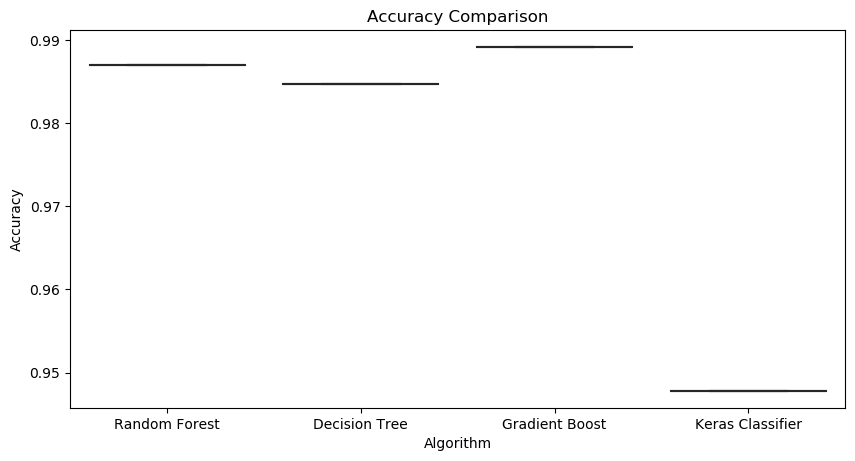

In [70]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.boxplot(y = acc,x = model1,palette='dark')

***
<b><font color="blue">Observation: </font></b> From the plot above we see that the Gradient Boost model gave the best accuracy score followed by the Random Forest model and then the Decision Tree. The Keras Classifier gave the least accuracy score of 94%
***

## Making Prediction

In [72]:
data = np.array([[14,18, 70, 23.603016, 60.3, 6.7, 140.91]])
prediction = GBC.predict(data)
print(prediction)

['cashew']
